In [1]:
import random as rn
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Setting Parameters

In [2]:
# winp = 18.0/37
# rn.seed(2)

initial_budget = 3000 # Initial budget
min_bet = 2.5 # Minimum bet  
max_bet = 100 # Max bet   # 2.5, 5, 10, 20, 40 = 77.5.. # 2.5 7.5 22.5 67 
spins = 100000 # Number of spins
num_simulations=200

## Spin

In [3]:
def record_creation(spins):
    recordList = [] #result list

    for i in range(spins):
        
        numnum = rn.randint(0, 36)
        if numnum == 0:
            recordList.append('Green')
        elif (1<= numnum <= 18): # change 0 to 1 for 50/50
            recordList.append("Red") # Nobody cares about the actual color of each number
        else:
            recordList.append("Black")
    return recordList

## Simplest Betting

Only 2.0% of bettors have postive resutls after an average of 5356.72 bets and 11000 spins
Average final budget from 200 simulations of 5356.72 bets : 2625.875


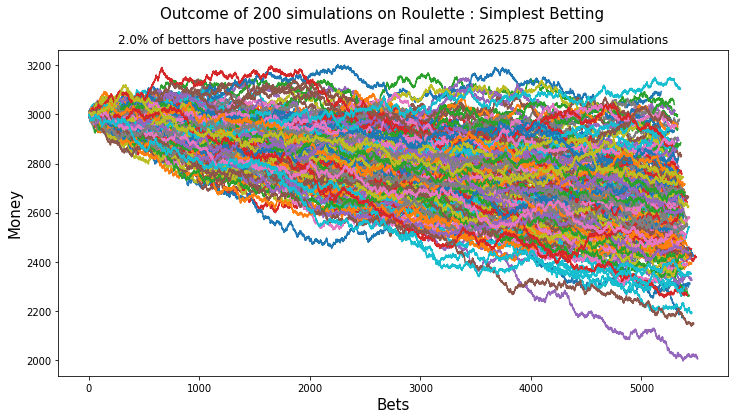

In [4]:
# WinLose function : Custom Betting Scale
def Win_or_Lose_Simplest(initial_budget, spins, bet_size, recordList):
    
    money = initial_budget
    output =[]
    
    for i in range(1,spins):
        if recordList[i-1]=='Black':
            if money <= 0:
                pass
            elif recordList[i]=='Red':
                money += bet_size
                output.append(money)
            else:
                money -= bet_size
                output.append(money)
    return output

plt.figure(figsize=(12,6))

win_counter=0
numberofbets=[]
end_budget=[]

for n in range(num_simulations):
    rn.seed(n)
    recordList = record_creation(11000)
    simu = Win_or_Lose_Simplest(initial_budget, 11000, min_bet, recordList)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    end_budget.append(simu[-1])
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),11000))
print("Average final budget from {} simulations of {} bets : {}".format( num_simulations, np.mean(numberofbets),np.mean(end_budget)))

plt.suptitle('Outcome of {} simulations on Roulette : Simplest Betting'.format(num_simulations), fontsize=15)
plt.title("{}% of bettors have postive resutls. Average final amount {} after {} simulations".format(win_percent, np.mean(end_budget), num_simulations))
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Simplest_Bet.jpeg', bbox_inches='tight')
plt.show()

### Sequence function

In [5]:
def minirecordlistfun(recordList):
    minirecordlist=[]
    for j in range(len(recordList)):    
        if j>=3:
            a0=recordList[j-3]
            a=recordList[j-2]
            b=recordList[j-1]
            c=recordList[j]
            minirecordlist_temp=[a0,a,b,c]
            minirecordlist.append(minirecordlist_temp)
    return minirecordlist

## Simple Betting : Min Bet on Red After 4x Black

Only 2.5% of bettors have postive resutls after an average of 5606.375 bets and 100000 spins
Average final budget from 200 simulations of 5606.375 bets : 2626.2125


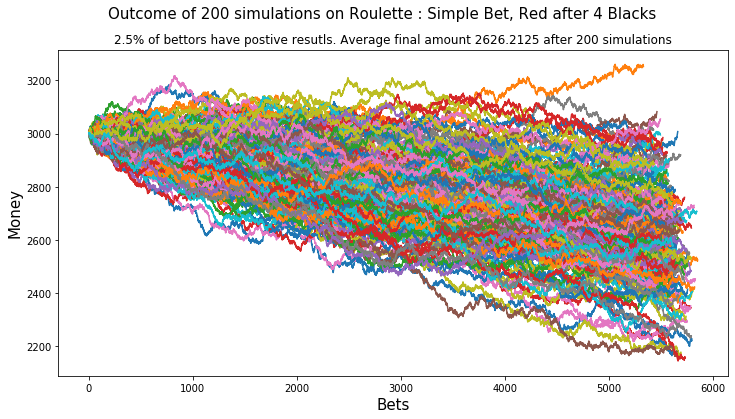

In [7]:
# WinLose function : Custom Betting Scale
def Win_or_Lose_Basic(initial_budget, spins, min_bet, recordList):
    
    money = initial_budget
    output =[]
    bet_size=min_bet
    minirecordlist=minirecordlistfun(recordList)
    
    for i in range(spins):
        if i<4:
            pass
        else:
            if minirecordlist[i-4]==['Black','Black','Black','Black']:
                if money <= 0:
                    pass
                elif recordList[i]=='Red':
                    money += bet_size
                    output.append(money)
                else:
                    money -= bet_size
                    output.append(money)
    return output

plt.figure(figsize=(12,6))

win_counter=0
numberofbets=[]
end_budget=[]

for n in range(num_simulations):
    rn.seed(n)
    recordList=record_creation(spins)
    simu=Win_or_Lose_Basic(initial_budget, spins, min_bet,recordList)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    end_budget.append(simu[-1])
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),spins))
print("Average final budget from {} simulations of {} bets : {}".format( num_simulations, np.mean(numberofbets),np.mean(end_budget)))

plt.suptitle('Outcome of {} simulations on Roulette : Simple Bet, Red after 4 Blacks'.format(num_simulations), fontsize=15)
plt.title("{}% of bettors have postive resutls. Average final amount {} after {} simulations".format(win_percent, np.mean(end_budget), num_simulations))
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Basic_Bet.jpeg', bbox_inches='tight')
plt.show()

## Martingale Simulation!

Simplest Martingale

Only 13.5% of bettors have postive resutls after an average of 5441.785 bets and 11500 spins
Average final budget from 200 simulations of 5441.785 bets : 1741.91875


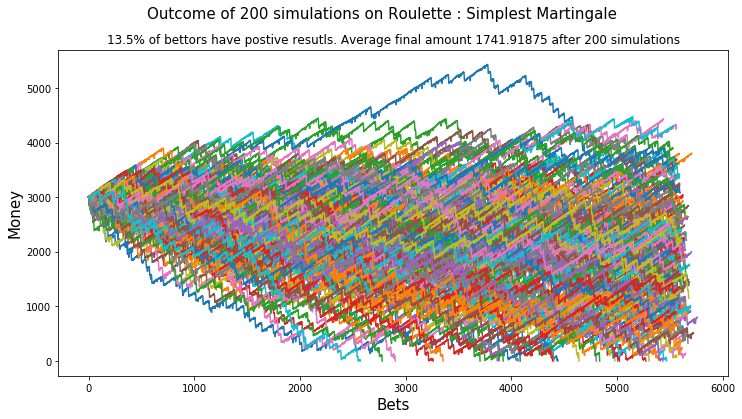

In [13]:
# WinLose function : Custom Betting Scale
def Win_or_Lose_Simplest_Mart(initial_budget, spins, bet_size, recordList):
    
    money = initial_budget
    output =[]
    
    for i in range(1,spins):
        if recordList[i-1]=='Black':
            if money <= 0:
                pass
            elif recordList[i]=='Red':
                money += bet_size
                bet_size = min_bet
                output.append(money)
            else:
                money -= bet_size
                bet_size = np.min((2 * bet_size, max_bet))
                output.append(money)
                if bet_size >= max_bet:
                    bet_size = min_bet/2.0
                if bet_size > money:
                    bet_size = money
    return output

plt.figure(figsize=(12,6))

win_counter=0
numberofbets=[]
end_budget=[]

for n in range(num_simulations):
    rn.seed(n)
    recordList = record_creation(11500)
    simu = Win_or_Lose_Simplest_Mart(initial_budget, 11500, min_bet, recordList)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    end_budget.append(simu[-1])
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),11500))
print("Average final budget from {} simulations of {} bets : {}".format( num_simulations, np.mean(numberofbets),np.mean(end_budget)))

plt.suptitle('Outcome of {} simulations on Roulette : Simplest Martingale'.format(num_simulations), fontsize=15)
plt.title("{}% of bettors have postive resutls. Average final amount {} after {} simulations".format(win_percent, np.mean(end_budget), num_simulations))
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Simplest_Martingale.jpeg', bbox_inches='tight')
plt.show()

"Safe" Martingale

Only 8.5% of bettors have postive resutls after an average of 5453.865 bets and 100000 spins
Average final budget of 1593.1125 from simulations of 200 bets : 5453.865


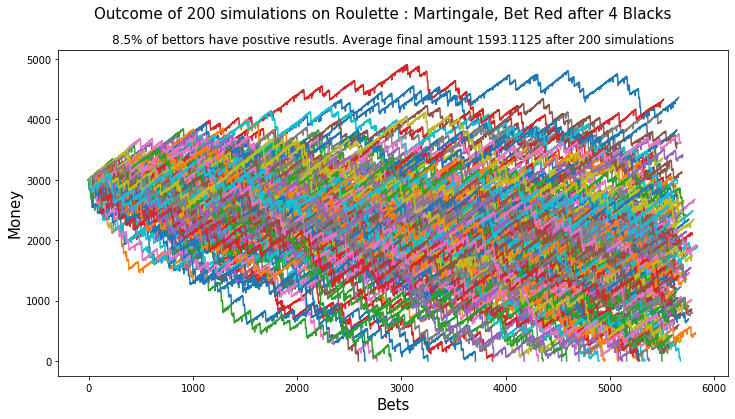

In [8]:
## 4X-SAFE Martingale
def Win_or_Lose(initial_budget, max_bet, spins, min_bet,recordList):

    money = initial_budget
    output =[]
    bet_size=min_bet
    minirecordlist=minirecordlistfun(recordList)
    
    for i in range(spins):
        if i<4:
            pass
        else:
            if minirecordlist[i-4]==['Black','Black','Black','Black']:
                if money <= 0:
                    pass
                elif recordList[i]=='Red':
                    money += bet_size
                    bet_size = min_bet
                    output.append(money)
                else:
                    money -= bet_size
                    bet_size = np.min((2 * bet_size, max_bet))
                    output.append(money)
                    if bet_size >= max_bet:
                        bet_size = min_bet/2.0
                    if bet_size > money:
                        bet_size = money
    return output

plt.figure(figsize=(12,6))
win_counter=0
numberofbets=[]
end_budget=[]

for n in range(num_simulations):
    rn.seed(n)
    recordList=record_creation(spins)
    simu=Win_or_Lose(initial_budget, max_bet, spins, min_bet,recordList)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    end_budget.append(simu[-1])
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),spins))
print("Average final budget of {} from simulations of {} bets : {}".format(np.mean(end_budget), num_simulations, np.mean(numberofbets)))

plt.suptitle('Outcome of {} simulations on Roulette : Martingale, Bet Red after 4 Blacks'.format(num_simulations), fontsize=15)
plt.title("{}% of bettors have posιtive resutls. Average final amount {} after {} simulations".format(win_percent, np.mean(end_budget), num_simulations))
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Martingale.jpeg', bbox_inches='tight')
plt.show()

## Scaling

In [9]:
# Power Bet Scaling
def bet_scaling(initial_bet,max_bet,power):
    bet=[]
    bet.append(initial_bet)
    for i in range(10):
        if bet[i]**(2)<float(max_bet):
            bet.append(bet[i]**(2))
        else:
            break
    return bet

# Completely Custom
def bet_scaling_custom():
    bet=[2.5, 5, 12.5 ,30, 70, 150 ]  # 2.5, 5, 10, 20, 40
    return bet

## Simulation Pt II : Custom Bet Scaling 

In [10]:
# WinLose function : Custom Betting Scale
def Win_or_Lose_Custom(initial_budget, max_bet, spins, min_bet,recordList,custom_bet_scale):
    
    money = initial_budget
    output =[]
    bet_size=min_bet
    minirecordlist=minirecordlistfun(recordList)
    count=0
    
    for i in range(spins):
        if i<4:
            pass
        else:
            if minirecordlist[i-4]==['Black','Black','Black','Black']:
                if money <= 0:
                    pass
                elif recordList[i]=='Red':
                    money += bet_size
                    bet_size = min_bet
                    output.append(money)
                    count=0
                else:
                    money -= bet_size
                    bet_size = custom_bet_scale[count]
                    output.append(money)
                    count+=1
                    if bet_size >= max_bet:
                        count=0
                    if bet_size > money:
                        bet_size = money
    return output

Only 18.0% of bettors have postive resutls after an average of 5361.515 bets and 100000 spins
Average final budget from 200 simulations of 5361.515 bets : 1715.55


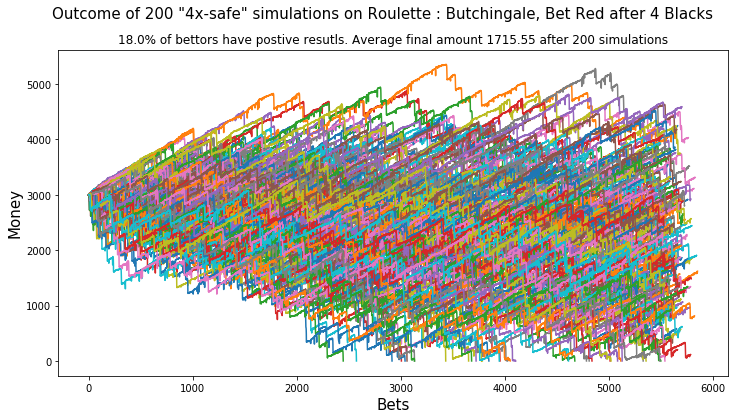

In [11]:
plt.figure(figsize=(12,6))
win_counter=0
numberofbets=[]
custom_bet_scale=bet_scaling_custom()

for n in range(num_simulations):
    rn.seed(n)
    recordList=record_creation(spins)
    simu=Win_or_Lose_Custom(initial_budget, max_bet, spins, min_bet,recordList,custom_bet_scale)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    end_budget.append(simu[-1])
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),spins))
print("Average final budget from {} simulations of {} bets : {}".format( num_simulations, np.mean(numberofbets),np.mean(end_budget)))

plt.suptitle('Outcome of {} "4x-safe" simulations on Roulette : Butchingale, Bet Red after 4 Blacks'.format(num_simulations), fontsize=15)
plt.title("{}% of bettors have postive resutls. Average final amount {} after {} simulations".format(win_percent, np.mean(end_budget), num_simulations))
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Custom.jpeg', bbox_inches='tight')
plt.show()

## Simulation Pt ΙII : Custom Bet Scaling, No 4B b4 Red

In [14]:
# WinLose function : Custom Betting Scale
def Win_or_Lose_Custom_Basic(initial_budget, max_bet, spins, min_bet,recordList,custom_bet_scale):
    
    money = initial_budget
    output =[]
    bet_size=min_bet
    minirecordlist=minirecordlistfun(recordList)
    count=0
    
    for i in range(1,spins):
        if recordList[i-1]=='Black':
            if money <= 0:
                pass
            elif recordList[i]=='Red':
                money += bet_size
                bet_size = min_bet
                output.append(money)
                count=0
            else:
                money -= bet_size
                bet_size = custom_bet_scale[count]
                output.append(money)
                count+=1
                if bet_size >= max_bet:
                    count=0
                if bet_size > money:
                    bet_size = money
    return output

Only 17.5% of bettors have postive resutls after an average of 5347.74 bets and 11500 spins
Average final budget from 200 simulations of 5347.74 bets : 1205.4770833333334


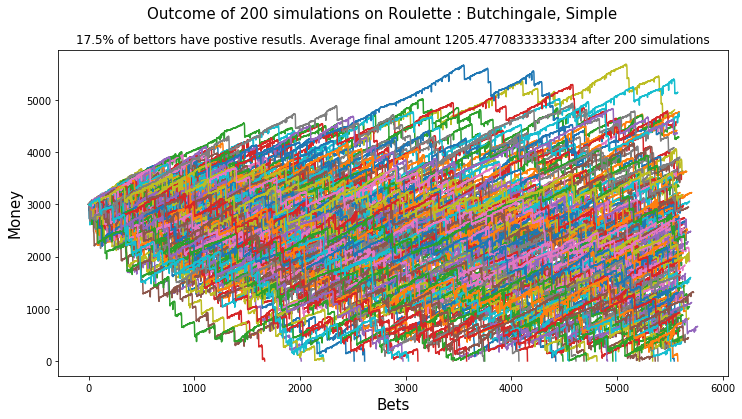

In [16]:
plt.figure(figsize=(12,6))
win_counter=0
numberofbets=[]
custom_bet_scale=bet_scaling_custom()

for n in range(num_simulations):
    rn.seed(n)
    recordList=record_creation(11500)
    simu=Win_or_Lose_Custom_Basic(initial_budget, max_bet, 11500, min_bet,recordList,custom_bet_scale)
    if simu[-1]>float(initial_budget):
        win_counter+=1
    plt.plot(simu)
    end_budget.append(simu[-1])
    numberofbets.append(len(simu))
win_percent = 100*win_counter/num_simulations

print("Only {}% of bettors have postive resutls after an average of {} bets and {} spins".format(win_percent, np.mean(numberofbets),11500))
print("Average final budget from {} simulations of {} bets : {}".format( num_simulations, np.mean(numberofbets),np.mean(end_budget)))

plt.suptitle('Outcome of {} simulations on Roulette : Butchingale, Simple'.format(num_simulations), fontsize=15)
plt.title("{}% of bettors have postive resutls. Average final amount {} after {} simulations".format(win_percent, np.mean(end_budget), num_simulations))
plt.xlabel('Bets', fontsize=15)
plt.ylabel('Money', fontsize=15)
plt.savefig('Custom_Basic.jpeg', bbox_inches='tight')
plt.show()